# **Projet Machine learning optimisation - ISE3**      

<div style="border: 2px solid #e74c3c; padding: 10px; border-radius: 5px; text-align: center; background-color: #fdecea; color: #c0392b; font-weight: bold;">
Descente de gradient Vs Newton
</div>

****
**MEMBRE DU GROUPE**
* 
* ANATO Diane
* NSIMOUESSA Dieuveil Nathan

## <div id=A style="color:black;display:fill;border-radius:5px;background-color:rgb(102, 102, 102);overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center;font-family: cursive;">TABLE DES MATIERES</p></div>


- <a href='#'>Introduction et présentation de la base de données du boston</a> 
- <a href='#1'>1.Importation de la base de données et quelque statisques descriptives</a> 
    - <a href='#1.1'>1.1. Importation de la base de données</a> 
    - <a href='#1.2'>1.2. quelque statisques descriptives</a> 
    
- <a href='#2'>2. Traitement des données manquantes</a> 

- <a href='#3.'>3. Modélisation</a> 
    - <a href='#3.1'>3.1. Contruction du modèle et optimisation par descente de gradient et Newton</a> 
    - <a href='#B.3.2'>3.3. Convergence de la méthode de Newton et convergence de la descente de gradient</a> 
    
- <a href='#concl'>Conclusion</a> 

## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center"> Introduction et présentation de la base de données de Boston </p></div>

Le dataset Boston Housing est un jeu de données classique en machine learning, souvent utilisé pour des tâches de régression. Il contient des informations sur 506 quartiers de la ville de Boston, avec pour objectif de prédire le prix médian des maisons en fonction de différentes caractéristiques socio-économiques et environnementales.

Voici les principales caractéristiques :

- CRIM : Taux de criminalité par habitant.
- ZN : Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
- INDUS : Proportion de terres non commerciales dans la ville.
- CHAS : Variable binaire indiquant si la maison est située près de la rivière Charles (1 = oui, 0 = non).
- NOX : Concentration d'oxyde d'azote (en parties par 10 millions).
- RM : Nombre moyen de pièces par maison.
- AGE : Proportion de maisons construites avant 1940.
- DIS : Distance pondérée vers les cinq centres d'emploi de Boston.
- RAD : Indice d'accessibilité aux routes à péage.
- TAX : Taux d'imposition des propriétés.
- PTRATIO : Ratio élèves/enseignants par ville.
- B :  1000(B_k - 0.63)^2 où \( B_k \) est la proportion de Noirs dans la ville. 
- LSTAT : Pourcentage de la population considérée comme à faible statut socio-économique.
- MEDV : Prix médian des maisons (en milliers de dollars).

## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">1.Importation de la base de données et quelque statisques descriptives </p></div>

> #  1.1. Importation de la base de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import gradient_descent, newton_method

# Charger les données Boston
boston = load_boston()
X = boston.data
y = boston.target


> #  1.2. Quelques statistiques descriptive

In [2]:
data_booston=pd.DataFrame(y, columns=["MEDV"])
data_booston.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">2. Traitement des données </p></div>

In [3]:


# 5. Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajouter un biais
#X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# Ajouter un biais
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))






## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">3. Modélisation </p></div>

L'estimation des moindres carrés constitue l'un des algorithmes fondamentaux en apprentissage automatique. Dans ce cadre, étant donné une matrice  $A$ de dimensions  $ n \times 1 $ et un vecteur $b$ de dimensions  $ n \times 1 $, notre objectif est de déterminer un vecteur $x \in \mathbb{R}^d$ qui minimise la fonction suivante :

$$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

Dans cet exercice, nous allons nous concentrer sur l'ajustement de \( x \) à l'aide de l'estimation des moindres carrés.

Il est important de noter que cette fonction est $\mu$-fortement convexe, avec $\mu = \lambda_{\text{min}}(\nabla^2 f(x)) = \frac{1}{n} \lambda_{\text{min}}(A^T A)$, et qu'elle est $L$-lisse, avec $L = \lambda_{\text{max}}(\nabla^2 f(x)) = \frac{1}{n} \lambda_{\text{max}}(A^T A)$. Cela est dû au fait que la matrice Hessienne reste constante et indépendante de $x$.

Lorsque $A^{T} A $ est inversible, ce qui est notre cas ici, nous pouvons obtenir une solution explicite pour le vecteur $x^*$
 qui minimise $f(x) $. En effet, résoudre l'équation $\nabla f(x^*) = 0$ nous conduit à la relation suivante :

$x^* = (A^T A)^{-1} A^T b$

> #  3.1. Contruction du modèle et optimisation par descente de gradient et Newton

In [4]:
# Exécuter les deux méthodes
# Exécuter les deux méthodes
theta_gd_1, history_gd_1 = gradient_descent(X_scaled, y, lr=0.1, iterations=100)
theta_gd_2, history_gd_2 = gradient_descent(X_scaled, y, lr=0.01, iterations=100)
theta_gd_2, history_gd_2 = gradient_descent(X_scaled, y, lr=0.001, iterations=100)
theta_gd_3, history_gd_3 = gradient_descent(X_scaled, y, lr=0.0001, iterations=100)
theta_gd_4, history_gd_4 = gradient_descent(X_scaled, y, lr=0.00001, iterations=100)




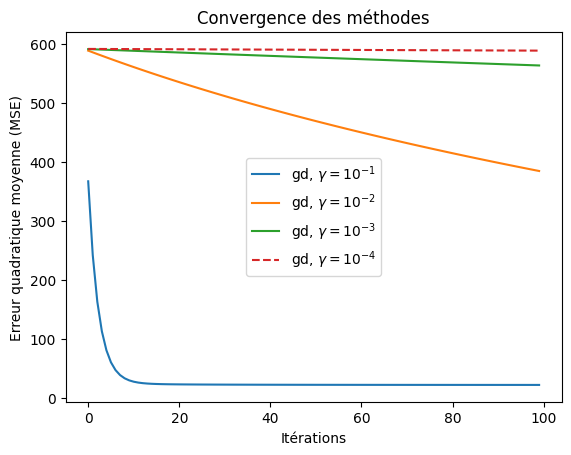

In [5]:
plt.plot(history_gd_1, label="gd, $\gamma = 10^{-1}$")
plt.plot(history_gd_2, label="gd, $\gamma = 10^{-2}$")
plt.plot(history_gd_3, label="gd, $\gamma = 10^{-3}$")
plt.plot(history_gd_4, label="gd, $\gamma = 10^{-4}$", linestyle='--')
plt.xlabel('Itérations')
plt.ylabel('Erreur quadratique moyenne (MSE)')
plt.title('Convergence des méthodes')
plt.legend()
plt.show()

La méthode de descente converge plus rapidement quand le learning rate est  0,1.

> # 3.2. Convergence de la méthode de Newton et convergence de la descente de gradient

In [6]:
# Exécuter les deux méthodes
# Exécuter les deux méthodes
theta_gd, history_gd = gradient_descent(X_scaled, y, lr=0.01, iterations=100)
theta_newton, history_newton = newton_method(X_scaled, y, iterations=100)



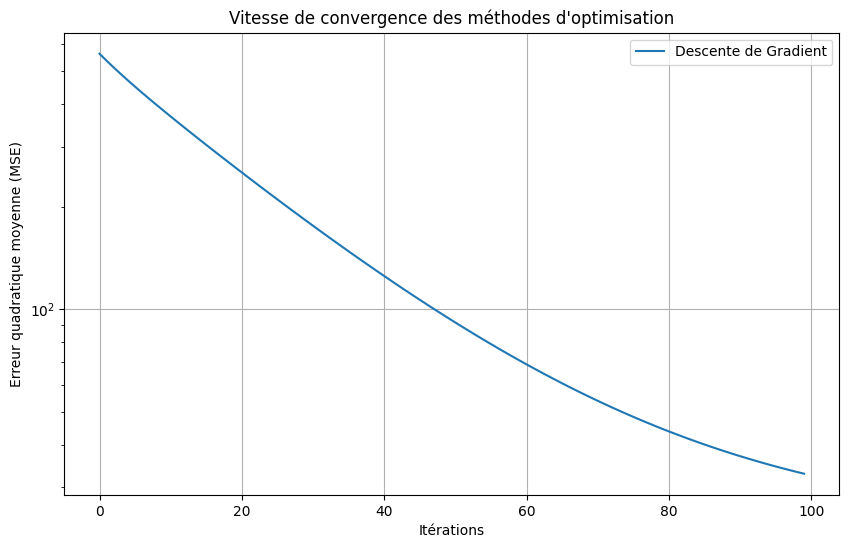

In [7]:
# Visualiser la convergence
plt.figure(figsize=(10, 6))
plt.plot(history_gd, label='Descente de Gradient')
#plt.plot(history_newton, label='Méthode de Newton')
plt.title('Vitesse de convergence des méthodes d\'optimisation')
plt.xlabel('Itérations')
plt.ylabel('Erreur quadratique moyenne (MSE)')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

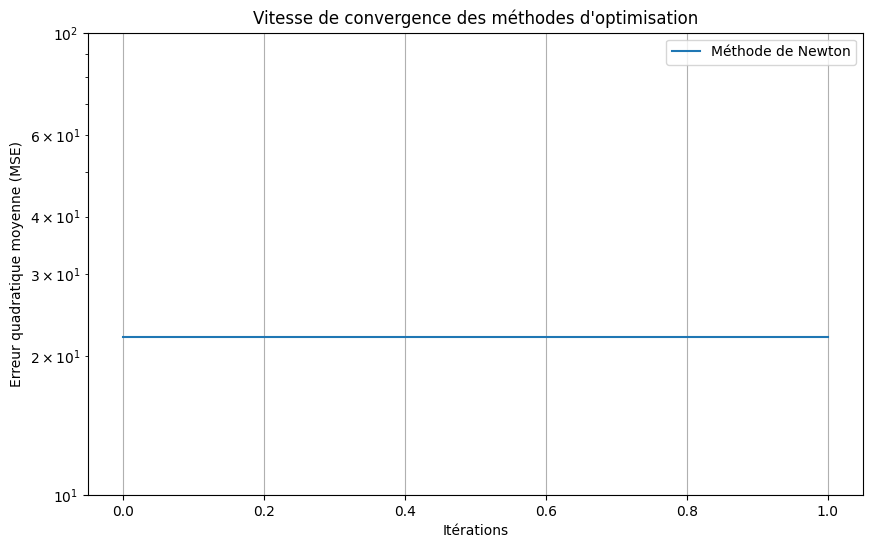

In [8]:
# Visualiser la convergence
plt.figure(figsize=(10, 6))
#plt.plot(history_gd, label='Descente de Gradient')
plt.plot(history_newton, label='Méthode de Newton')
plt.title('Vitesse de convergence des méthodes d\'optimisation')
plt.xlabel('Itérations')
plt.ylabel('Erreur quadratique moyenne (MSE)')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()